<div id="container" style="position:relative;">
<div style="float:left"><h1>  Final Project: Predicting Start-up Success </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

By: Jakob Larson

Data Source - Kaggle: https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase

H0 (Null hypothesis) = Funding, Funding Rounds, City of Origin, and Industry Impact the likelihood of a Startup success

H1 (Alternative hypothesis) = These varibales have no impact on the outcome

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltb

In [2]:
df = pd.read_csv('data/big_startup_secsees_dataset.csv')
df.head()

permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           2000000   
4                                           Software                 -   

      status country_code state_code                 region           city  \
0  operating          IND         16                 Mumbai         Mumbai   
1  operating          USA         DE             DE - Other  Delaware City   
2  operating          NaN        NaN                    NaN            NaN   
3  operating          CHN         22                Beijing        Beijing   
4  operating          USA         IL  Springfield, Illinois      Champaign   

   funding_rounds  founded_at first_funding_at last_funding_at  
0               1         NaN       2015-01-05      2015-01-05  
1               2  2014-09-04       2014-03-01      2014-10-14  
2               1         NaN       2014-01-30      2014-01-30  
3               1  2007-01-01       2008-03-19      2008-03-19  
4               1  2010-01-01       2014-07-24      2014-07-24

In [3]:
df.tail()

permalink  \
66363  /organization/zznode-science-and-technology-co...   
66364                          /organization/zzzzapp-com   
66365                                /organization/Áeron   
66366                              /organization/Ôasys-2   
66367  /organization/İnovatiff-reklam-ve-tanıtım-hizm...   

                                             name            homepage_url  \
66363               ZZNode Science and Technology   http://www.zznode.com   
66364                       Zzzzapp Wireless ltd.  http://www.zzzzapp.com   
66365                                       ÁERON    http://www.aeron.hu/   
66366                                       Ôasys    http://www.oasys.io/   
66367  İnovatiff Reklam ve Tanıtım Hizmetleri Tic    http://inovatiff.com   

                                           category_list funding_total_usd  \
66363                                Enterprise Software           1587301   
66364        Advertising|Mobile|Web Development|Wireless            114304   
66365                                                NaN                 -   
66366  Consumer Electronics|Internet of Things|Teleco...             18192   
66367                 Consumer Goods|E-Commerce|Internet             14851   

          status country_code state_code       region           city  \
66363  operating          CHN         22      Beijing        Beijing   
66364  operating          HRV         15        Split          Split   
66365  operating          NaN        NaN          NaN            NaN   
66366  operating          USA         CA  SF Bay Area  San Francisco   
66367  operating          NaN        NaN          NaN            NaN   

       funding_rounds  founded_at first_funding_at last_funding_at  
66363               1         NaN       2012-04-01      2012-04-01  
66364               4  2012-05-13       2011-11-01      2014-03-01  
66365               1  2011-01-01       2014-08-01      2014-08-01  
66366               1  2014-01-01       2015-01-01      2015-01-01  
66367               1         NaN       2013-10-01      2013-10-01

In [4]:
df.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [5]:
# read in the csv file and parse the 11th, 12th, and 13th columns as datetime64
df = pd.read_csv('data/big_startup_secsees_dataset.csv', parse_dates=[11, 12, 13])

# convert the '11th' column from object to datetime64
df.iloc[:, 11] = pd.to_datetime(df.iloc[:, 11], errors='coerce')

# convert the '12th' column from object to datetime64
df.iloc[:, 12] = pd.to_datetime(df.iloc[:, 12], errors='coerce')

# convert the '13th' column from object to datetime64
df.iloc[:, 13] = pd.to_datetime(df.iloc[:, 13], errors='coerce')

# print the data types of each column
print(df.dtypes)

permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd            object
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
dtype: object


In [6]:
df.describe(include='all')

/var/folders/4g/9_hc6pbj3wz6k79w160ylkk00000gn/T/ipykernel_27476/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
/var/folders/4g/9_hc6pbj3wz6k79w160ylkk00000gn/T/ipykernel_27476/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
/var/folders/4g/9_hc6pbj3wz6k79w160ylkk00000gn/T/ipykernel_27476/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence thi

permalink   name                homepage_url category_list  \
count                 66368  66367                       61310         63220   
unique                66368  66102                       61191         27296   
top     /organization/-fame  Blink  http://www.askforoffer.com      Software   
freq                      1      4                           5          3995   
first                   NaN    NaN                         NaN           NaN   
last                    NaN    NaN                         NaN           NaN   
mean                    NaN    NaN                         NaN           NaN   
std                     NaN    NaN                         NaN           NaN   
min                     NaN    NaN                         NaN           NaN   
25%                     NaN    NaN                         NaN           NaN   
50%                     NaN    NaN                         NaN           NaN   
75%                     NaN    NaN                         NaN           NaN   
max                     NaN    NaN                         NaN           NaN   

       funding_total_usd     status country_code state_code       region  \
count              66368      66368        59410      57821        58338   
unique             18896          4          137        311         1092   
top                    -  operating          USA         CA  SF Bay Area   
freq               12785      53034        37601      12900         8804   
first                NaN        NaN          NaN        NaN          NaN   
last                 NaN        NaN          NaN        NaN          NaN   
mean                 NaN        NaN          NaN        NaN          NaN   
std                  NaN        NaN          NaN        NaN          NaN   
min                  NaN        NaN          NaN        NaN          NaN   
25%                  NaN        NaN          NaN        NaN          NaN   
50%                  NaN        NaN          NaN        NaN          NaN   
75%                  NaN        NaN          NaN        NaN          NaN   
max                  NaN        NaN          NaN        NaN          NaN   

                 city  funding_rounds           founded_at  \
count           58340    66368.000000                51143   
unique           5111             NaN                 3974   
top     San Francisco             NaN  2012-01-01 00:00:00   
freq             3526             NaN                 2730   
first             NaN             NaN  1749-01-01 00:00:00   
last              NaN             NaN  2105-02-17 00:00:00   
mean              NaN        1.732522                  NaN   
std               NaN        1.360251                  NaN   
min               NaN        1.000000                  NaN   
25%               NaN        1.000000                  NaN   
50%               NaN        1.000000                  NaN   
75%               NaN        2.000000                  NaN   
max               NaN       19.000000                  NaN   

           first_funding_at      last_funding_at  
count                 66341                66368  
unique                 4814                 4518  
top     2014-01-01 00:00:00  2014-01-01 00:00:00  
freq                    565                  483  
first   1960-01-01 00:00:00  1971-01-01 00:00:00  
last    2015-12-05 00:00:00  2115-12-01 00:00:00  
mean                    NaN                  NaN  
std                     NaN                  NaN  
min                     NaN                  NaN  
25%                     NaN                  NaN  
50%                     NaN                  NaN  
75%                     NaN                  NaN  
max                     NaN                  NaN

In [7]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [8]:
df["country_code"]

0        IND
1        USA
2        NaN
3        CHN
4        USA
        ... 
66363    CHN
66364    HRV
66365    NaN
66366    USA
66367    NaN
Name: country_code, Length: 66368, dtype: object

In [9]:
# clean the data to only include values appearing in the USA
df_usa = df[df['country_code'] == 'USA']

In [10]:
df_usa.describe(include='all')

/var/folders/4g/9_hc6pbj3wz6k79w160ylkk00000gn/T/ipykernel_27476/1818273265.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_usa.describe(include='all')
/var/folders/4g/9_hc6pbj3wz6k79w160ylkk00000gn/T/ipykernel_27476/1818273265.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_usa.describe(include='all')
/var/folders/4g/9_hc6pbj3wz6k79w160ylkk00000gn/T/ipykernel_27476/1818273265.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to sil

permalink   name                homepage_url  \
count                    37601  37600                       34660   
unique                   37601  37488                       34599   
top     /organization/-qounter  Roost  http://www.askforoffer.com   
freq                         1      4                           3   
first                      NaN    NaN                         NaN   
last                       NaN    NaN                         NaN   
mean                       NaN    NaN                         NaN   
std                        NaN    NaN                         NaN   
min                        NaN    NaN                         NaN   
25%                        NaN    NaN                         NaN   
50%                        NaN    NaN                         NaN   
75%                        NaN    NaN                         NaN   
max                        NaN    NaN                         NaN   

       category_list funding_total_usd     status country_code state_code  \
count          36655             37601      37601        37601      37559   
unique         15464             10187          4            1         53   
top         Software                 -  operating          USA         CA   
freq            2674              6172      29429        37601      12900   
first            NaN               NaN        NaN          NaN        NaN   
last             NaN               NaN        NaN          NaN        NaN   
mean             NaN               NaN        NaN          NaN        NaN   
std              NaN               NaN        NaN          NaN        NaN   
min              NaN               NaN        NaN          NaN        NaN   
25%              NaN               NaN        NaN          NaN        NaN   
50%              NaN               NaN        NaN          NaN        NaN   
75%              NaN               NaN        NaN          NaN        NaN   
max              NaN               NaN        NaN          NaN        NaN   

             region           city  funding_rounds           founded_at  \
count         37493          37493    37601.000000                30600   
unique          246           2630             NaN                 3091   
top     SF Bay Area  San Francisco             NaN  2011-01-01 00:00:00   
freq           8804           3526             NaN                 1613   
first           NaN            NaN             NaN  1766-01-01 00:00:00   
last            NaN            NaN             NaN  2016-01-01 00:00:00   
mean            NaN            NaN        1.923513                  NaN   
std             NaN            NaN        1.557549                  NaN   
min             NaN            NaN        1.000000                  NaN   
25%             NaN            NaN        1.000000                  NaN   
50%             NaN            NaN        1.000000                  NaN   
75%             NaN            NaN        2.000000                  NaN   
max             NaN            NaN       19.000000                  NaN   

           first_funding_at      last_funding_at  
count                 37587                37601  
unique                 4400                 4041  
top     2013-01-01 00:00:00  2014-01-01 00:00:00  
freq                    243                  191  
first   1960-01-01 00:00:00  1973-04-15 00:00:00  
last    2015-12-04 00:00:00  2015-12-12 00:00:00  
mean                    NaN                  NaN  
std                     NaN                  NaN  
min                     NaN                  NaN  
25%                     NaN                  NaN  
50%                     NaN                  NaN  
75%                     NaN                  NaN  
max                     NaN                  NaN

In [11]:
df_usa.head()

permalink              name  \
1           /organization/-qounter          :Qounter   
4   /organization/004-technologies  004 Technologies   
7             /organization/0xdata            H2O.ai   
8                  /organization/1          One Inc.   
10           /organization/1-4-all           1-4 All   

                         homepage_url  \
1              http://www.qounter.com   
4   http://004gmbh.de/en/004-interact   
7                      http://h2o.ai/   
8                  http://whatis1.com   
10                                NaN   

                                        category_list funding_total_usd  \
1   Application Platforms|Real Time|Social Network...            700000   
4                                            Software                 -   
7                                           Analytics          33600000   
8                                              Mobile           1150050   
10                       Entertainment|Games|Software                 -   

       status country_code state_code                 region  \
1   operating          USA         DE             DE - Other   
4   operating          USA         IL  Springfield, Illinois   
7   operating          USA         CA            SF Bay Area   
8   operating          USA         CA            SF Bay Area   
10  operating          USA         NC             NC - Other   

                 city  funding_rounds founded_at first_funding_at  \
1       Delaware City               2 2014-09-04       2014-03-01   
4           Champaign               1 2010-01-01       2014-07-24   
7       Mountain View               4 2011-01-01       2013-01-03   
8       San Francisco               3 2011-08-01       2011-07-20   
10  Connellys Springs               1        NaT       2013-04-21   

   last_funding_at  
1       2014-10-14  
4       2014-07-24  
7       2015-11-09  
8       2014-02-05  
10      2013-04-21

In [12]:
# read the original dataframe
df = pd.read_csv('data/big_startup_secsees_dataset.csv')

# select only rows with country_code 'USA'
df_usa = df[df['country_code'] == 'USA']

# save the new dataframe to a .pickle file
df_usa.to_pickle('usa_dataframe.pickle')

In [13]:
df2 = pd.read_pickle('data/usa_dataframe.pickle')
df2.head()

permalink              name  \
1           /organization/-qounter          :Qounter   
4   /organization/004-technologies  004 Technologies   
7             /organization/0xdata            H2O.ai   
8                  /organization/1          One Inc.   
10           /organization/1-4-all           1-4 All   

                         homepage_url  \
1              http://www.qounter.com   
4   http://004gmbh.de/en/004-interact   
7                      http://h2o.ai/   
8                  http://whatis1.com   
10                                NaN   

                                        category_list funding_total_usd  \
1   Application Platforms|Real Time|Social Network...            700000   
4                                            Software                 -   
7                                           Analytics          33600000   
8                                              Mobile           1150050   
10                       Entertainment|Games|Software                 -   

       status country_code state_code                 region  \
1   operating          USA         DE             DE - Other   
4   operating          USA         IL  Springfield, Illinois   
7   operating          USA         CA            SF Bay Area   
8   operating          USA         CA            SF Bay Area   
10  operating          USA         NC             NC - Other   

                 city  funding_rounds  founded_at first_funding_at  \
1       Delaware City               2  2014-09-04       2014-03-01   
4           Champaign               1  2010-01-01       2014-07-24   
7       Mountain View               4  2011-01-01       2013-01-03   
8       San Francisco               3  2011-08-01       2011-07-20   
10  Connellys Springs               1         NaN       2013-04-21   

   last_funding_at  
1       2014-10-14  
4       2014-07-24  
7       2015-11-09  
8       2014-02-05  
10      2013-04-21

In [14]:
# read in the pickle file
df2 = pd.read_pickle('data/usa_dataframe.pickle')

# convert the '11th' column from object to datetime64
df2.iloc[:, 11] = pd.to_datetime(df2.iloc[:, 11], errors='coerce')

# convert the '12th' column from object to datetime64
df2.iloc[:, 12] = pd.to_datetime(df2.iloc[:, 12], errors='coerce')

# convert the '13th' column from object to datetime64
df2.iloc[:, 13] = pd.to_datetime(df2.iloc[:, 13], errors='coerce')

# print the data types of each column
print(df2.dtypes)

permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd            object
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
dtype: object


In [15]:
df2.iloc[0]

permalink                                       /organization/-qounter
name                                                          :Qounter
homepage_url                                    http://www.qounter.com
category_list        Application Platforms|Real Time|Social Network...
funding_total_usd                                               700000
status                                                       operating
country_code                                                       USA
state_code                                                          DE
region                                                      DE - Other
city                                                     Delaware City
funding_rounds                                                       2
founded_at                                         2014-09-04 00:00:00
first_funding_at                                   2014-03-01 00:00:00
last_funding_at                                    2014-10-14 00:00:00
Name: 

In [16]:
# replace '-' values with 0
df2['funding_total_usd'] = df2['funding_total_usd'].replace('-', '0')

# convert the column to numeric data type
df2['funding_total_usd'] = df2['funding_total_usd'].astype('float').fillna(0).astype('int64')
print(df2.dtypes)

permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd             int64
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
dtype: object


In [17]:
df2['category_list'].apply(type).value_counts()

<class 'str'>      36655
<class 'float'>      946
Name: category_list, dtype: int64

In [62]:
#print(df2['category_list'].unique().tolist())

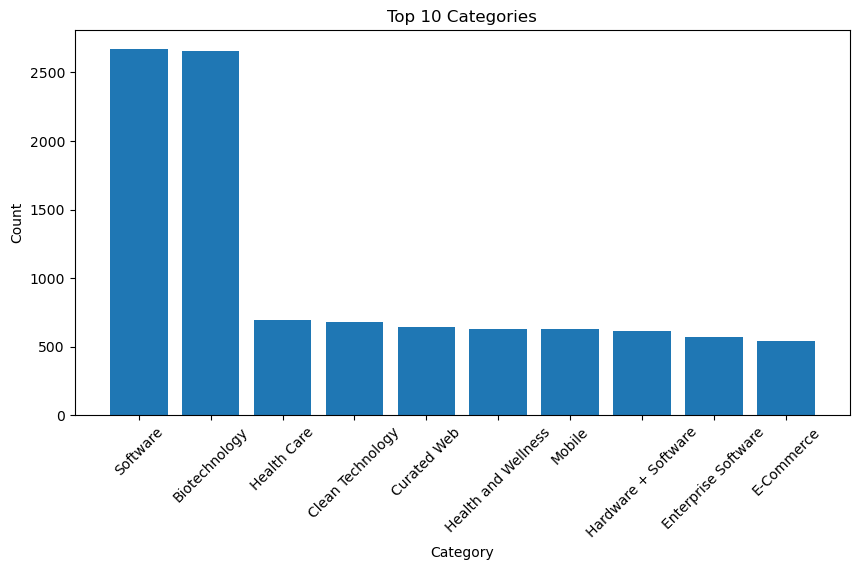

In [19]:
import matplotlib.pyplot as plt

# Get counts of each category
category_counts = df2['category_list'].value_counts()

# Select the top 10 categories
top_categories = category_counts[:10]

# Create a bar chart of the top 10 categories
plt.figure(figsize=(10, 5))
plt.bar(top_categories.index, top_categories.values)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Categories')
plt.show()

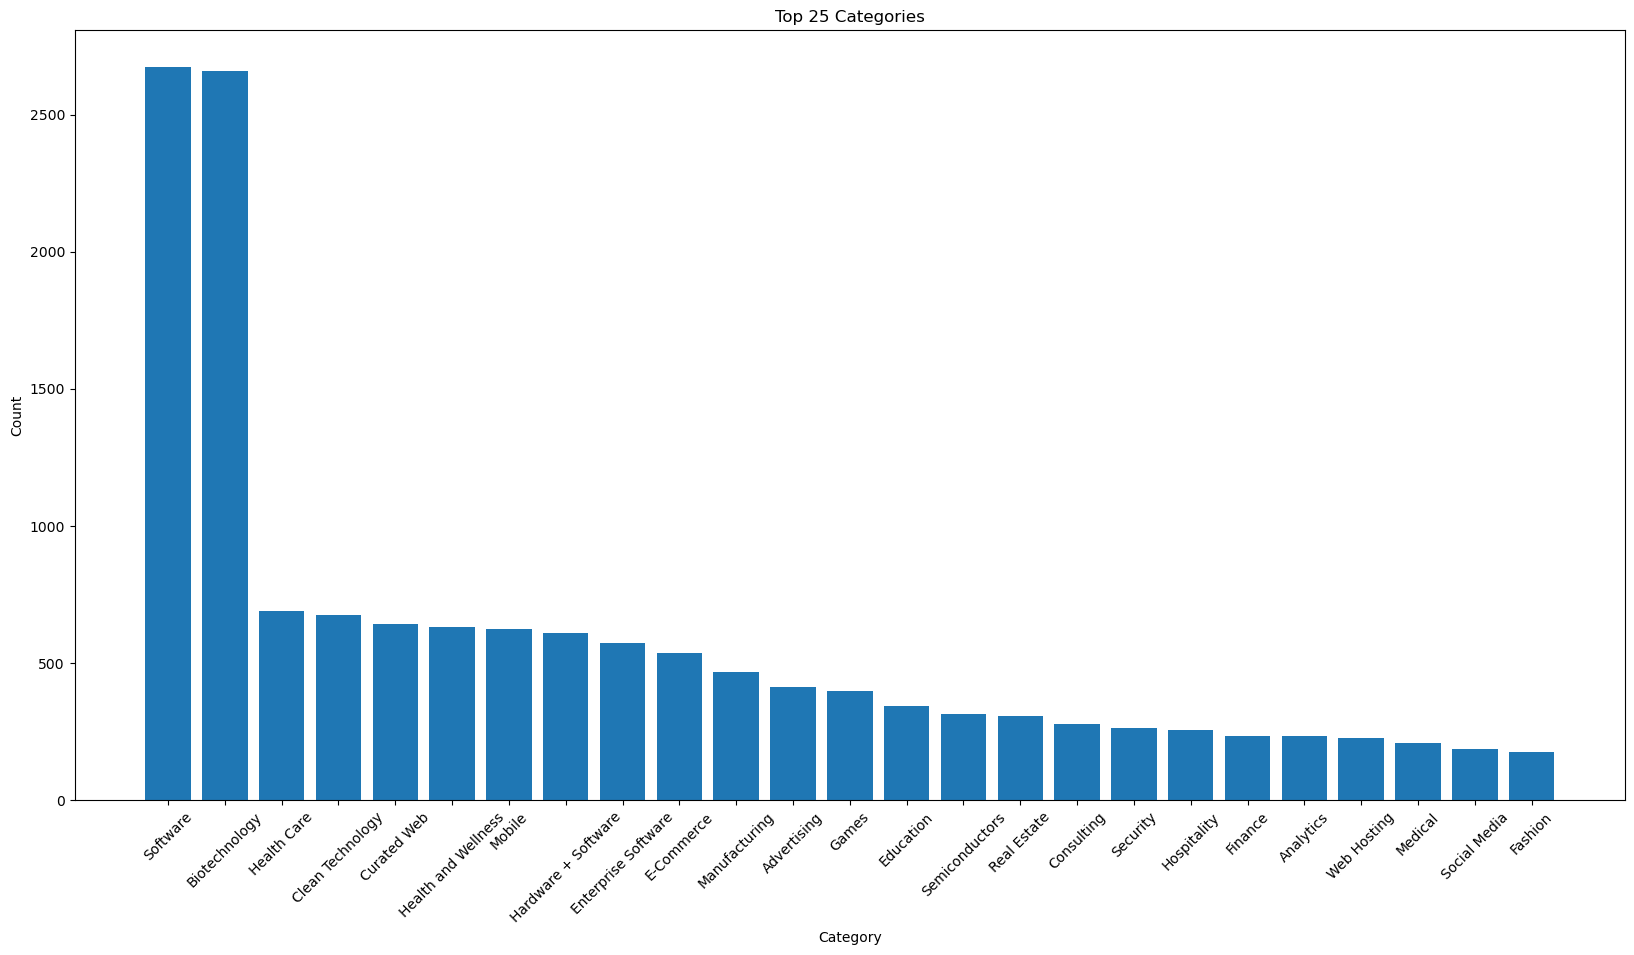

In [20]:
# Get counts of each category
category_counts = df2['category_list'].value_counts()

# Select the top 25 categories
top_categories = category_counts[:25]

# Create a bar chart of the top 25 categories
plt.figure(figsize=(20, 10))
plt.bar(top_categories.index, top_categories.values)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 25 Categories')
plt.show()


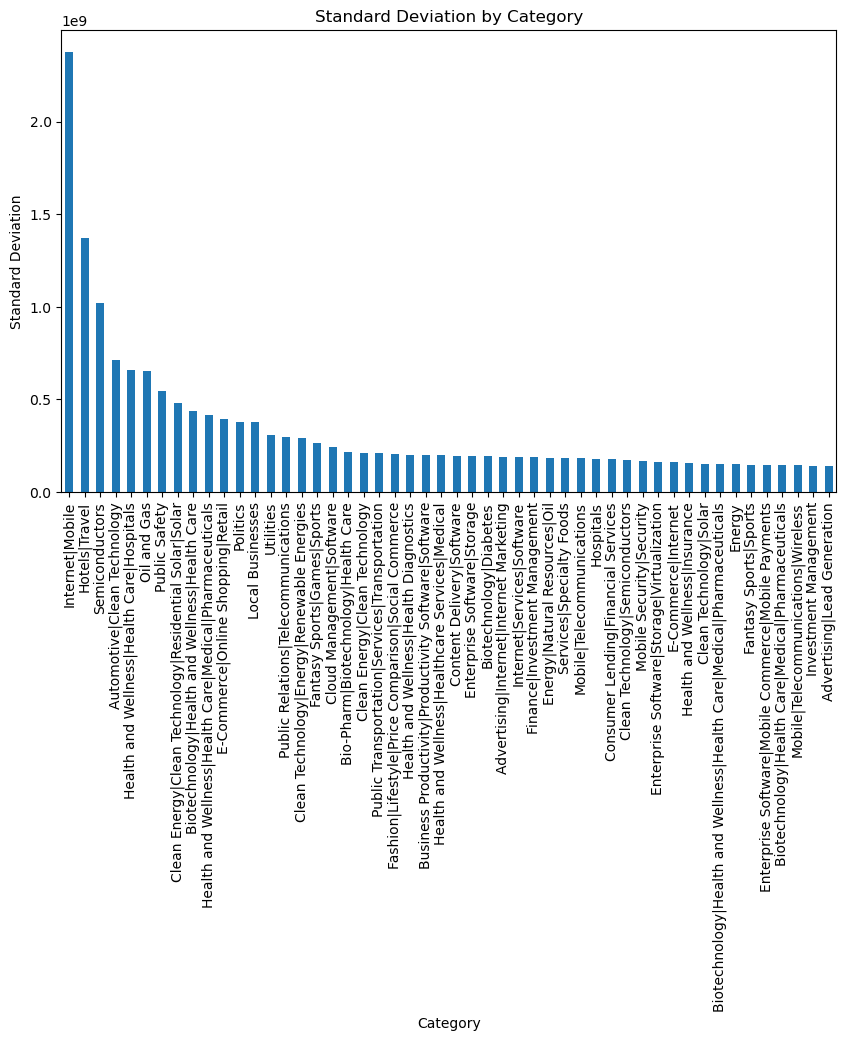

In [21]:
# Read in the data
df2 = pd.read_pickle('data/usa_dataframe.pickle')

# Replace '-' with NaN in funding_total_usd column
df2['funding_total_usd'] = pd.to_numeric(df2['funding_total_usd'], errors='coerce')

# Group the data by category and calculate the standard deviation
std_by_category = df2.groupby('category_list')['funding_total_usd'].std()

# Sort the data by descending standard deviation
std_by_category = std_by_category.sort_values(ascending=False)

# Plot the standard deviation for each category
std_by_category.head(50).plot(kind='bar', figsize=(10,6), title='Standard Deviation by Category')
plt.xlabel('Category')
plt.ylabel('Standard Deviation')
plt.show()

In [22]:
df2 = pd.read_pickle('data/usa_dataframe.pickle')

# Count the number of rows in the original dataframe
num_rows_original = len(df)
print("Number of rows in original dataframe:", num_rows_original)

# Count the number of rows with missing funding values
num_rows_missing_funding = len(df[df['funding_total_usd'] == '-'])
print("Number of rows with missing funding values:", num_rows_missing_funding)

# Drop the rows with missing funding values and save as a new .pickle file
df = df[df['funding_total_usd'] != '-']
df.to_pickle('data/usa_dataframe_onlyshowingvalueswithfunding.pickle')

Number of rows in original dataframe: 66368
Number of rows with missing funding values: 12785


In [23]:
df3 = pd.read_pickle('data/usa_dataframe_onlyshowingvalueswithfunding.pickle')
df3.head()

permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
5     /organization/01games-technology      01Games Technology   

             homepage_url                                      category_list  \
0      http://livfame.com                                              Media   
1  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
2     http://oneofthem.jp                                  Apps|Games|Mobile   
3      http://www.0-6.com                                        Curated Web   
5  http://www.01games.hk/                                              Games   

  funding_total_usd     status country_code state_code      region  \
0          10000000  operating          IND         16      Mumbai   
1            700000  operating          USA         DE  DE - Other   
2           3406878  operating          NaN        NaN         NaN   
3           2000000  operating          CHN         22     Beijing   
5             41250  operating          HKG        NaN   Hong Kong   

            city  funding_rounds  founded_at first_funding_at last_funding_at  
0         Mumbai               1         NaN       2015-01-05      2015-01-05  
1  Delaware City               2  2014-09-04       2014-03-01      2014-10-14  
2            NaN               1         NaN       2014-01-30      2014-01-30  
3        Beijing               1  2007-01-01       2008-03-19      2008-03-19  
5      Hong Kong               1         NaN       2014-07-01      2014-07-01

In [24]:
num_rows_original2 = len(df3)
print("Number of rows in original dataframe:", num_rows_original2)

Number of rows in original dataframe: 53583


In [25]:
#import geopy
#from geopy.geocoders import GoogleV3

## Set up geocoder with Google Maps API key
#geolocator = GoogleV3(api_key='---')

## Define a function to geocode a city and return the latitude and longitude
#def geocode_city(city):
#    location = geolocator.geocode(city)
#    if location is None:
#        return None, None
#    else:
#        return location.latitude, location.longitude

## Apply the geocoding function to the 'city' column and create new 'latitude' and 'longitude' columns
#df[['latitude', 'longitude']] = df['city'].apply(geocode_city).apply(pd.Series)

#df.to_pickle('data/usa_dataframe_with_lat_long.pickle')

In [26]:
df4 = pd.read_pickle('data/usa_dataframe_with_lat_long.pickle')
df4.head()

permalink                         name  \
1                     /organization/-qounter                     :Qounter   
7                       /organization/0xdata                       H2O.ai   
8                            /organization/1                     One Inc.   
13               /organization/1-800-doctors                1-800-DOCTORS   
14  /organization/1-800-publicrelations-inc-  1-800-PublicRelations, Inc.   

                          homepage_url  \
1               http://www.qounter.com   
7                       http://h2o.ai/   
8                   http://whatis1.com   
13              http://1800doctors.com   
14  http://www.1800publicrelations.com   

                                        category_list funding_total_usd  \
1   Application Platforms|Real Time|Social Network...            700000   
7                                           Analytics          33600000   
8                                              Mobile           1150050   
13                                Health and Wellness           1750000   
14          Internet Marketing|Media|Public Relations           6000000   

       status country_code state_code         region           city  \
1   operating          USA         DE     DE - Other  Delaware City   
7   operating          USA         CA    SF Bay Area  Mountain View   
8   operating          USA         CA    SF Bay Area  San Francisco   
13  operating          USA         NJ         Newark         Iselin   
14  operating          USA         NY  New York City       New York   

    funding_rounds  founded_at first_funding_at last_funding_at   latitude  \
1                2  2014-09-04       2014-03-01      2014-10-14  39.577890   
7                4  2011-01-01       2013-01-03      2015-11-09  37.386052   
8                3  2011-08-01       2011-07-20      2014-02-05  37.774929   
13               1  1984-01-01       2011-03-02      2011-03-02  40.575382   
14               1  2013-10-24       2015-02-01      2015-02-01  40.712775   

     longitude  
1   -75.588815  
7  -122.083851  
8  -122.419415  
13  -74.322370  
14  -74.005973

In [27]:
num_rows_original3 = len(df4)
print("Number of rows in original dataframe:", num_rows_original3)

Number of rows in original dataframe: 31429


In [28]:
country_codes = df4['country_code'].unique()
print(country_codes)

['USA']


In [29]:
import plotly.express as px
import pandas as pd

#This map shows the U.S.

# Read in the data
df4 = pd.read_pickle('data/usa_dataframe_with_lat_long.pickle')

# Group the records by city name and count the number of occurrences
city_counts = df4.groupby(['city']).size().reset_index(name='count')

# Join with the df4 DataFrame to get the latitude and longitude for each city
city_counts = pd.merge(city_counts, df4[['city', 'latitude', 'longitude']].drop_duplicates(), on='city')

# Group the city counts by latitude and longitude
city_groups = city_counts.groupby(['latitude', 'longitude'])

# Create an empty list to hold the scatter mapbox objects
scatter_mapbox_objs = []

# Iterate over the groups and create a scatter mapbox object for each group
for group_name, group_data in city_groups:
    group_data = group_data.sort_values(by='count', ascending=False)
    text = '<br>'.join(f"{name} ({count})" for name, count in zip(group_data['city'], group_data['count']))
    scatter_mapbox_objs.append(
        px.scatter_mapbox(group_data, lat='latitude', lon='longitude', color='count', size='count',
                          hover_name='city', hover_data={'count': ':,'},
                          mapbox_style='carto-positron', zoom=1, height=600, size_max=5)
        .update_traces(text=text)
    )

# Combine all the scatter mapbox objects into a single figure
fig = scatter_mapbox_objs[0]
for i in range(1, len(scatter_mapbox_objs)):
    fig.add_traces(scatter_mapbox_objs[i].data)

# Set the center coordinate and zoom level of the Mapbox layout
fig.update_layout(
    mapbox=dict(
        center=dict(lat=34.0902, lon=-95.7129),
        zoom=3
    )
)

# Show the map
fig.show()

In [61]:
#This map shows San Fran.

# Read in the data
df4 = pd.read_pickle('data/usa_dataframe_with_lat_long.pickle')

# Group the records by city name and count the number of occurrences
city_counts = df4.groupby(['city']).size().reset_index(name='count')

# Join with the df4 DataFrame to get the latitude and longitude for each city
city_counts = pd.merge(city_counts, df4[['city', 'latitude', 'longitude']].drop_duplicates(), on='city')

# Group the city counts by latitude and longitude
city_groups = city_counts.groupby(['latitude', 'longitude'])

# Create an empty list to hold the scatter mapbox objects
scatter_mapbox_objs = []

# Iterate over the groups and create a scatter mapbox object for each group
for group_name, group_data in city_groups:
    group_data = group_data.sort_values(by='count', ascending=False)
    text = '<br>'.join(f"{name} ({count})" for name, count in zip(group_data['city'], group_data['count']))
    scatter_mapbox_objs.append(
        px.scatter_mapbox(group_data, lat='latitude', lon='longitude', color='count', size='count',
                          hover_name='city', hover_data={'count': ':,'},
                          mapbox_style='carto-positron', zoom=1, height=600, size_max=5)
        .update_traces(text=text)
    )

# Combine all the scatter mapbox objects into a single figure
fig = scatter_mapbox_objs[0]
for i in range(1, len(scatter_mapbox_objs)):
    fig.add_traces(scatter_mapbox_objs[i].data)

# Set the center coordinate and zoom level of the Mapbox layout
fig.update_layout(
    mapbox=dict(
        center=dict(lat=37.7517, lon=-122.4407),
        zoom=8
    )
)

# Show the map
fig.show()

In [31]:
unique_count = df4['status'].nunique()
print(unique_count)

4


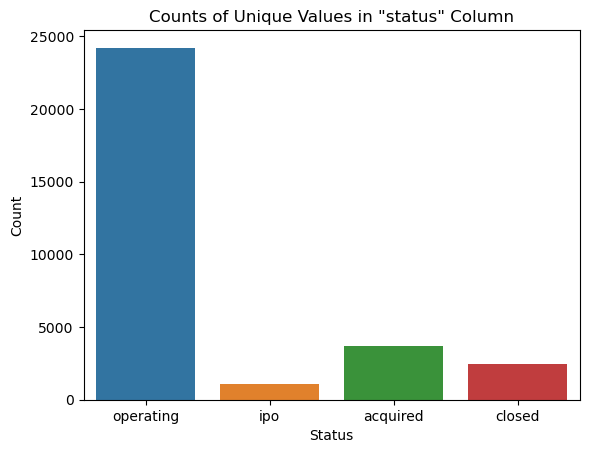

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the "status" column
counts = df4['status'].value_counts().reset_index()

# Rename the columns to "status" and "count"
counts.columns = ['status', 'count']

# Set the order of the bars in the plot
order = ['operating', 'ipo', 'acquired', 'closed']

# Create the bar plot using Seaborn
sns.barplot(x='status', y='count', data=counts, order=order)

# Add labels to the plot
plt.title('Counts of Unique Values in "status" Column')
plt.xlabel('Status')
plt.ylabel('Count')

# Show the plot
plt.show()


operating: 77.06%
acquired: 11.82%
closed: 7.77%
ipo: 3.35%


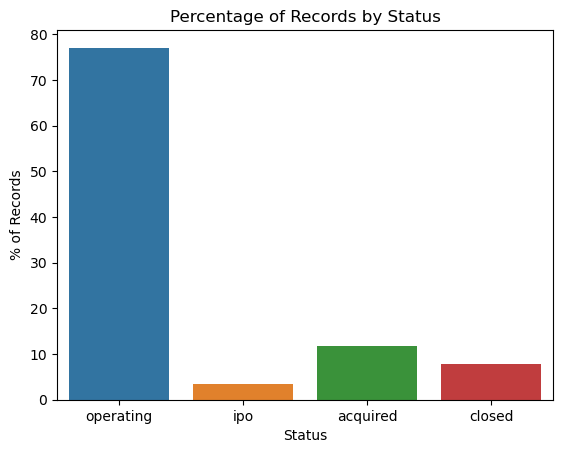

In [33]:
# Read in the data
df4 = pd.read_pickle('data/usa_dataframe_with_lat_long.pickle')

# Calculate the percentage likelihood of each status value
counts = df4['status'].value_counts(normalize=True) * 100

# Create the bar plot
sns.barplot(x=counts.index, y=counts, order=['operating', 'ipo', 'acquired', 'closed'])
plt.xlabel('Status')
plt.ylabel('% of Records')
plt.title('Percentage of Records by Status')

# Print out the percentage likelihood of each status value
for status, percentage in zip(counts.index, counts):
    print(f"{status}: {percentage:.2f}%")

# Show the plot
plt.show()



In [34]:
df4.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'latitude', 'longitude'],
      dtype='object')

In [35]:
# print the data types of each column
print(df4.dtypes)

permalink             object
name                  object
homepage_url          object
category_list         object
funding_total_usd     object
status                object
country_code          object
state_code            object
region                object
city                  object
funding_rounds         int64
founded_at            object
first_funding_at      object
last_funding_at       object
latitude             float64
longitude            float64
dtype: object


In [36]:
# read in the pickle file
df4 = pd.read_pickle('data/usa_dataframe_with_lat_long.pickle')

# convert the '11th' column from object to datetime64
df4.iloc[:, 11] = pd.to_datetime(df4.iloc[:, 11], errors='coerce')

# convert the '12th' column from object to datetime64
df4.iloc[:, 12] = pd.to_datetime(df4.iloc[:, 12], errors='coerce')

# convert the '13th' column from object to datetime64
df4.iloc[:, 13] = pd.to_datetime(df4.iloc[:, 13], errors='coerce')

# replace '-' values with 0
df4['funding_total_usd'] = df4['funding_total_usd'].replace('-', '0')

# convert the column to numeric data type
df4['funding_total_usd'] = df4['funding_total_usd'].astype('float').fillna(0).astype('int64')

# print the data types of each column
print(df4.dtypes)

num_rows_original3 = len(df4)
print("Number of rows in original dataframe:", num_rows_original3)

permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd             int64
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
latitude                    float64
longitude                   float64
dtype: object
Number of rows in original dataframe: 31429


In [37]:
sns.pairplot(df4)
plt.show()

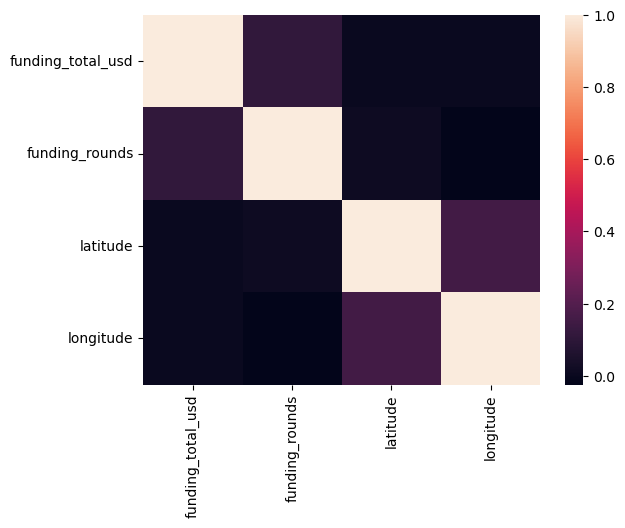

In [38]:
sns.heatmap(df4.corr())
plt.show()

Need to convert some of these object values to numerical values

In [39]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store label encoders for each column
le_dict = {}

# List of columns to encode
cols_to_encode = ['category_list', 'status', 'state_code', 'region', 'city']

# Loop over columns to encode and fit label encoder
for col in cols_to_encode:
    le = LabelEncoder()
    le.fit(df4[col])
    df4[col + '_encoded'] = le.transform(df4[col])
    le_dict[col] = le

# Print the encoded values for each column
for col in cols_to_encode:
    print(f"{col}: {le_dict[col].classes_}")

# Drop the original object columns
df4.drop(cols_to_encode, axis=1, inplace=True)


category_list: ['3D Printing' '3D Printing|3D Technology'
 '3D Printing|3D Technology|Android|Artificial Intelligence|Drones|Enterprise Application|Entertainment|Entrepreneur|Games|Lasers|Mobile|Open Source|Robotics|Telecommunications'
 ... 'iPhone|Software' 'iPhone|Software|Sports|Windows Phone 7' nan]
status: ['acquired' 'closed' 'ipo' 'operating']
state_code: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY' nan]
region: ['AK - Other' 'AL - Other' 'AR - Other' 'AZ - Other' 'Akron - Canton'
 'Albany, Georgia' 'Albany, New York' 'Albuquerque' 'Alexandria'
 'Allentown' 'Anaheim' 'Anchorage' 'Asheville' 'Athens, Georgia' 'Atlanta'
 'Atlantic City' 'Augusta, Maine' 'Austin' 'Bakersfield' 'Baltimore'
 'Bangor' 'Baton Rouge' 'Billings' 'Biloxi - Gulfport' 'Birmingham'
 'Bismarck'

In [40]:
df4.columns
print(df4.dtypes)
df4.head()

permalink                        object
name                             object
homepage_url                     object
funding_total_usd                 int64
country_code                     object
funding_rounds                    int64
founded_at               datetime64[ns]
first_funding_at         datetime64[ns]
last_funding_at          datetime64[ns]
latitude                        float64
longitude                       float64
category_list_encoded             int64
status_encoded                    int64
state_code_encoded                int64
region_encoded                    int64
city_encoded                      int64
dtype: object


permalink                         name  \
1                     /organization/-qounter                     :Qounter   
7                       /organization/0xdata                       H2O.ai   
8                            /organization/1                     One Inc.   
13               /organization/1-800-doctors                1-800-DOCTORS   
14  /organization/1-800-publicrelations-inc-  1-800-PublicRelations, Inc.   

                          homepage_url  funding_total_usd country_code  \
1               http://www.qounter.com             700000          USA   
7                       http://h2o.ai/           33600000          USA   
8                   http://whatis1.com            1150050          USA   
13              http://1800doctors.com            1750000          USA   
14  http://www.1800publicrelations.com            6000000          USA   

    funding_rounds founded_at first_funding_at last_funding_at   latitude  \
1                2 2014-09-04       2014-03-01      2014-10-14  39.577890   
7                4 2011-01-01       2013-01-03      2015-11-09  37.386052   
8                3 2011-08-01       2011-07-20      2014-02-05  37.774929   
13               1 1984-01-01       2011-03-02      2011-03-02  40.575382   
14               1 2013-10-24       2015-02-01      2015-02-01  40.712775   

     longitude  category_list_encoded  status_encoded  state_code_encoded  \
1   -75.588815                   2367               3                   8   
7  -122.083851                   1305               3                   4   
8  -122.419415                  12268               3                   4   
13  -74.322370                  11064               3                  31   
14  -74.005973                  11627               3                  34   

    region_encoded  city_encoded  
1               51           481  
7              191          1261  
8              191          1696  
13             157           891  
14             156          1312

In [41]:
#I dropped the original columns and have now realized that I need them back

df5 = df4.copy()
df5.columns
print(df5.dtypes)
df5.head()

permalink                        object
name                             object
homepage_url                     object
funding_total_usd                 int64
country_code                     object
funding_rounds                    int64
founded_at               datetime64[ns]
first_funding_at         datetime64[ns]
last_funding_at          datetime64[ns]
latitude                        float64
longitude                       float64
category_list_encoded             int64
status_encoded                    int64
state_code_encoded                int64
region_encoded                    int64
city_encoded                      int64
dtype: object


permalink                         name  \
1                     /organization/-qounter                     :Qounter   
7                       /organization/0xdata                       H2O.ai   
8                            /organization/1                     One Inc.   
13               /organization/1-800-doctors                1-800-DOCTORS   
14  /organization/1-800-publicrelations-inc-  1-800-PublicRelations, Inc.   

                          homepage_url  funding_total_usd country_code  \
1               http://www.qounter.com             700000          USA   
7                       http://h2o.ai/           33600000          USA   
8                   http://whatis1.com            1150050          USA   
13              http://1800doctors.com            1750000          USA   
14  http://www.1800publicrelations.com            6000000          USA   

    funding_rounds founded_at first_funding_at last_funding_at   latitude  \
1                2 2014-09-04       2014-03-01      2014-10-14  39.577890   
7                4 2011-01-01       2013-01-03      2015-11-09  37.386052   
8                3 2011-08-01       2011-07-20      2014-02-05  37.774929   
13               1 1984-01-01       2011-03-02      2011-03-02  40.575382   
14               1 2013-10-24       2015-02-01      2015-02-01  40.712775   

     longitude  category_list_encoded  status_encoded  state_code_encoded  \
1   -75.588815                   2367               3                   8   
7  -122.083851                   1305               3                   4   
8  -122.419415                  12268               3                   4   
13  -74.322370                  11064               3                  31   
14  -74.005973                  11627               3                  34   

    region_encoded  city_encoded  
1               51           481  
7              191          1261  
8              191          1696  
13             157           891  
14             156          1312

In [42]:
# read in the pickle file
df5 = pd.read_pickle('data/usa_dataframe_with_lat_long.pickle')

# convert the '11th' column from object to datetime64
df5.iloc[:, 11] = pd.to_datetime(df5.iloc[:, 11], errors='coerce')

# convert the '12th' column from object to datetime64
df5.iloc[:, 12] = pd.to_datetime(df5.iloc[:, 12], errors='coerce')

# convert the '13th' column from object to datetime64
df5.iloc[:, 13] = pd.to_datetime(df5.iloc[:, 13], errors='coerce')

# replace '-' values with 0
df5['funding_total_usd'] = df5['funding_total_usd'].replace('-', '0')

# convert the column to numeric data type
df5['funding_total_usd'] = df5['funding_total_usd'].astype('float').fillna(0).astype('int64')

# print the data types of each column
print(df5.dtypes)

num_rows_original3 = len(df5)
print("Number of rows in original dataframe:", num_rows_original3)

permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd             int64
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
latitude                    float64
longitude                   float64
dtype: object
Number of rows in original dataframe: 31429


In [43]:
# Create a dictionary to store label encoders for each column
le_dict = {}

# List of columns to encode
cols_to_encode = ['category_list', 'status', 'state_code', 'region', 'city']

# Loop over columns to encode and fit label encoder
for col in cols_to_encode:
    le = LabelEncoder()
    encoded_col = le.fit_transform(df5[col])
    df5[col + '_encoded'] = encoded_col
    le_dict[col] = le
    df5[col + '_original'] = df5[col]

# Print the encoded values for each column
for col in cols_to_encode:
    print(f"{col}: {le_dict[col].classes_}")


category_list: ['3D Printing' '3D Printing|3D Technology'
 '3D Printing|3D Technology|Android|Artificial Intelligence|Drones|Enterprise Application|Entertainment|Entrepreneur|Games|Lasers|Mobile|Open Source|Robotics|Telecommunications'
 ... 'iPhone|Software' 'iPhone|Software|Sports|Windows Phone 7' nan]
status: ['acquired' 'closed' 'ipo' 'operating']
state_code: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY' nan]
region: ['AK - Other' 'AL - Other' 'AR - Other' 'AZ - Other' 'Akron - Canton'
 'Albany, Georgia' 'Albany, New York' 'Albuquerque' 'Alexandria'
 'Allentown' 'Anaheim' 'Anchorage' 'Asheville' 'Athens, Georgia' 'Atlanta'
 'Atlantic City' 'Augusta, Maine' 'Austin' 'Bakersfield' 'Baltimore'
 'Bangor' 'Baton Rouge' 'Billings' 'Biloxi - Gulfport' 'Birmingham'
 'Bismarck'

In [44]:
df5.columns
print(df5.dtypes)
df5.head()

permalink                         object
name                              object
homepage_url                      object
category_list                     object
funding_total_usd                  int64
status                            object
country_code                      object
state_code                        object
region                            object
city                              object
funding_rounds                     int64
founded_at                datetime64[ns]
first_funding_at          datetime64[ns]
last_funding_at           datetime64[ns]
latitude                         float64
longitude                        float64
category_list_encoded              int64
category_list_original            object
status_encoded                     int64
status_original                   object
state_code_encoded                 int64
state_code_original               object
region_encoded                     int64
region_original                   object
city_encoded    

permalink                         name  \
1                     /organization/-qounter                     :Qounter   
7                       /organization/0xdata                       H2O.ai   
8                            /organization/1                     One Inc.   
13               /organization/1-800-doctors                1-800-DOCTORS   
14  /organization/1-800-publicrelations-inc-  1-800-PublicRelations, Inc.   

                          homepage_url  \
1               http://www.qounter.com   
7                       http://h2o.ai/   
8                   http://whatis1.com   
13              http://1800doctors.com   
14  http://www.1800publicrelations.com   

                                        category_list  funding_total_usd  \
1   Application Platforms|Real Time|Social Network...             700000   
7                                           Analytics           33600000   
8                                              Mobile            1150050   
13                                Health and Wellness            1750000   
14          Internet Marketing|Media|Public Relations            6000000   

       status country_code state_code         region           city  ...  \
1   operating          USA         DE     DE - Other  Delaware City  ...   
7   operating          USA         CA    SF Bay Area  Mountain View  ...   
8   operating          USA         CA    SF Bay Area  San Francisco  ...   
13  operating          USA         NJ         Newark         Iselin  ...   
14  operating          USA         NY  New York City       New York  ...   

    category_list_encoded                             category_list_original  \
1                    2367  Application Platforms|Real Time|Social Network...   
7                    1305                                          Analytics   
8                   12268                                             Mobile   
13                  11064                                Health and Wellness   
14                  11627          Internet Marketing|Media|Public Relations   

   status_encoded status_original  state_code_encoded  state_code_original  \
1               3       operating                   8                   DE   
7               3       operating                   4                   CA   
8               3       operating                   4                   CA   
13              3       operating                  31                   NJ   
14              3       operating                  34                   NY   

    region_encoded region_original  city_encoded  city_original  
1               51      DE - Other           481  Delaware City  
7              191     SF Bay Area          1261  Mountain View  
8              191     SF Bay Area          1696  San Francisco  
13             157          Newark           891         Iselin  
14             156   New York City          1312       New York  

[5 rows x 26 columns]

In [45]:
df5.drop(['category_list_original', 'status_original', 'state_code_original', 'region_original', 'city_original'], axis=1, inplace=True)

In [46]:
df5.columns
print(df5.dtypes)
df5.head()

permalink                        object
name                             object
homepage_url                     object
category_list                    object
funding_total_usd                 int64
status                           object
country_code                     object
state_code                       object
region                           object
city                             object
funding_rounds                    int64
founded_at               datetime64[ns]
first_funding_at         datetime64[ns]
last_funding_at          datetime64[ns]
latitude                        float64
longitude                       float64
category_list_encoded             int64
status_encoded                    int64
state_code_encoded                int64
region_encoded                    int64
city_encoded                      int64
dtype: object


permalink                         name  \
1                     /organization/-qounter                     :Qounter   
7                       /organization/0xdata                       H2O.ai   
8                            /organization/1                     One Inc.   
13               /organization/1-800-doctors                1-800-DOCTORS   
14  /organization/1-800-publicrelations-inc-  1-800-PublicRelations, Inc.   

                          homepage_url  \
1               http://www.qounter.com   
7                       http://h2o.ai/   
8                   http://whatis1.com   
13              http://1800doctors.com   
14  http://www.1800publicrelations.com   

                                        category_list  funding_total_usd  \
1   Application Platforms|Real Time|Social Network...             700000   
7                                           Analytics           33600000   
8                                              Mobile            1150050   
13                                Health and Wellness            1750000   
14          Internet Marketing|Media|Public Relations            6000000   

       status country_code state_code         region           city  ...  \
1   operating          USA         DE     DE - Other  Delaware City  ...   
7   operating          USA         CA    SF Bay Area  Mountain View  ...   
8   operating          USA         CA    SF Bay Area  San Francisco  ...   
13  operating          USA         NJ         Newark         Iselin  ...   
14  operating          USA         NY  New York City       New York  ...   

    founded_at first_funding_at last_funding_at   latitude   longitude  \
1   2014-09-04       2014-03-01      2014-10-14  39.577890  -75.588815   
7   2011-01-01       2013-01-03      2015-11-09  37.386052 -122.083851   
8   2011-08-01       2011-07-20      2014-02-05  37.774929 -122.419415   
13  1984-01-01       2011-03-02      2011-03-02  40.575382  -74.322370   
14  2013-10-24       2015-02-01      2015-02-01  40.712775  -74.005973   

    category_list_encoded  status_encoded  state_code_encoded  region_encoded  \
1                    2367               3                   8              51   
7                    1305               3                   4             191   
8                   12268               3                   4             191   
13                  11064               3                  31             157   
14                  11627               3                  34             156   

    city_encoded  
1            481  
7           1261  
8           1696  
13           891  
14          1312  

[5 rows x 21 columns]

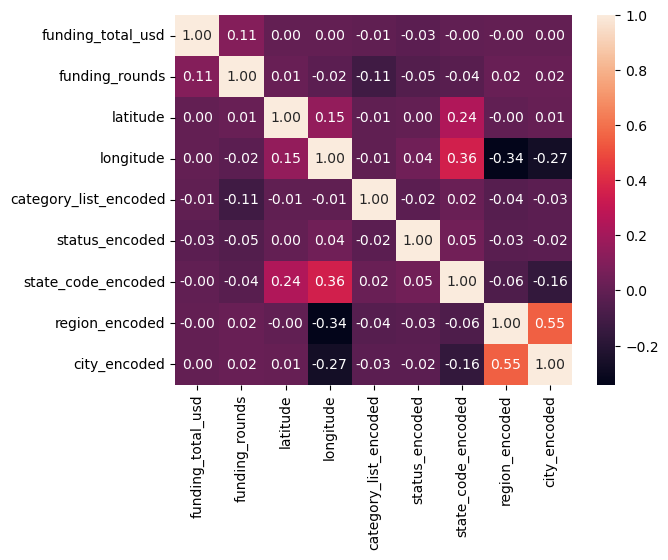

In [47]:
sns.heatmap(df5.corr(), annot=True, fmt='.2f')
plt.show()

In [48]:
df5.corr()

funding_total_usd  funding_rounds  latitude  longitude  \
funding_total_usd               1.000000        0.108155  0.000492   0.002845   
funding_rounds                  0.108155        1.000000  0.014703  -0.024724   
latitude                        0.000492        0.014703  1.000000   0.154123   
longitude                       0.002845       -0.024724  0.154123   1.000000   
category_list_encoded          -0.010144       -0.114925 -0.010403  -0.007676   
status_encoded                 -0.026578       -0.048595  0.000688   0.043267   
state_code_encoded             -0.001916       -0.037701  0.241622   0.355083   
region_encoded                 -0.000716        0.017392 -0.001146  -0.341826   
city_encoded                    0.000471        0.015107  0.012937  -0.269343   

                       category_list_encoded  status_encoded  \
funding_total_usd                  -0.010144       -0.026578   
funding_rounds                     -0.114925       -0.048595   
latitude                           -0.010403        0.000688   
longitude                          -0.007676        0.043267   
category_list_encoded               1.000000       -0.023269   
status_encoded                     -0.023269        1.000000   
state_code_encoded                  0.020540        0.049676   
region_encoded                     -0.037966       -0.030457   
city_encoded                       -0.026908       -0.023452   

                       state_code_encoded  region_encoded  city_encoded  
funding_total_usd               -0.001916       -0.000716      0.000471  
funding_rounds                  -0.037701        0.017392      0.015107  
latitude                         0.241622       -0.001146      0.012937  
longitude                        0.355083       -0.341826     -0.269343  
category_list_encoded            0.020540       -0.037966     -0.026908  
status_encoded                   0.049676       -0.030457     -0.023452  
state_code_encoded               1.000000       -0.064753     -0.160200  
region_encoded                  -0.064753        1.000000      0.551815  
city_encoded                    -0.160200        0.551815      1.000000

We are going to reject the Null hypothesis due to a lack in positive correlation across these variables. It does not appear that there is a distinct relationship between funding, funding rounds, city, and industry

In [49]:
df5.describe()

funding_total_usd  funding_rounds      latitude     longitude  \
count       3.142900e+04    31429.000000  29896.000000  29896.000000   
mean        2.130179e+07        2.088072     38.339288    -95.984460   
std         2.212258e+08        1.645399      5.709337     29.691169   
min         1.000000e+00        1.000000    -41.292381   -161.326347   
25%         5.094120e+05        1.000000     35.779590   -122.036350   
50%         3.000000e+06        1.000000     37.774929    -97.516428   
75%         1.360000e+07        3.000000     40.712775    -77.036871   
max         3.007950e+10       19.000000     64.963051    174.778746   

       category_list_encoded  status_encoded  state_code_encoded  \
count           31429.000000    31429.000000        31429.000000   
mean             8180.775717        2.456521           19.336695   
std              4076.934242        1.054814           15.684325   
min                 0.000000        0.000000            0.000000   
25%              4055.000000        3.000000            4.000000   
50%              8945.000000        3.000000           15.000000   
75%             12026.000000        3.000000           34.000000   
max             13386.000000        3.000000           52.000000   

       region_encoded  city_encoded  
count    31429.000000  31429.000000  
mean       136.306437   1138.291387  
std         68.303366    616.107288  
min          0.000000      0.000000  
25%         68.000000    516.000000  
50%        156.000000   1312.000000  
75%        191.000000   1696.000000  
max        242.000000   2198.000000

In [50]:
# Get counts of each category
category_counts = df5['category_list'].value_counts()

# Select the top 50 categories
top_categories = category_counts[:50]

# Print the top 50 categories and their counts
print(top_categories)


Biotechnology                       2587
Software                            2399
Health Care                          650
Clean Technology                     595
Health and Wellness                  586
Hardware + Software                  576
Mobile                               561
Enterprise Software                  520
Curated Web                          519
E-Commerce                           456
Manufacturing                        357
Advertising                          351
Games                                340
Semiconductors                       297
Education                            276
Security                             247
Analytics                            212
Web Hosting                          211
Finance                              188
Real Estate                          172
Biotechnology|Health Diagnostics     165
Social Media                         160
Consulting                           156
Hospitality                          154
Technology      

In [51]:
# Get counts of each category
category_counts2 = df5['city'].value_counts()

# Select the top 50 categories
top_categories2 = category_counts2[:50]

# Print the top 50 categories and their counts
print(top_categories2)

San Francisco     2994
New York          2703
Seattle            683
Austin             666
Palo Alto          648
Los Angeles        603
Boston             602
Chicago            558
San Diego          557
Mountain View      514
Cambridge          494
San Jose           409
Sunnyvale          379
Atlanta            347
Santa Clara        336
San Mateo          308
Redwood City       288
Santa Monica       252
Houston            242
Portland           240
Menlo Park         237
Boulder            230
Denver             230
Dallas             229
Pittsburgh         229
Washington         222
Irvine             204
Brooklyn           190
Nashville          178
Waltham            174
Philadelphia       171
Las Vegas          148
Miami              145
Minneapolis        144
Durham             143
Salt Lake City     141
Bellevue           140
Scottsdale         134
Cleveland          133
Fremont            132
St Louis           128
Raleigh            117
Baltimore          111
Oakland    

In [52]:
df5.to_pickle('ApplicationData.pickle')

In [53]:
df5.columns    

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'latitude', 'longitude', 'category_list_encoded',
       'status_encoded', 'state_code_encoded', 'region_encoded',
       'city_encoded'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df5[['category_list_encoded', 'city_encoded', 'funding_total_usd', 'funding_rounds']], df5['status_encoded'], test_size=0.2, random_state=42)

In [55]:
# Define the features (X) and target (y) variables
X = df5[['category_list_encoded', 'city_encoded', 'funding_total_usd', 'funding_rounds']]
y = df5['status_encoded']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.642379891823099


In [58]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'trained_model.joblib')


['trained_model.joblib']

In [59]:
#df5.to_csv('data/StartUp_CalculatorData.csv')

In [60]:
import ipywidgets as widgets
from IPython.display import display
import joblib
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Load the trained model from file
clf = joblib.load('trained_model.joblib')

# Limit the options for Industry Category and City to the top 50 most occurring values, sorted alphabetically
top_categories = sorted(df5['category_list'].value_counts().nlargest(50).index.tolist())
top_cities = sorted(df5['city'].value_counts().nlargest(50).index.tolist())

# Define the form for the user to input the features of a startup
category_list = widgets.Dropdown(options=top_categories, description='Industry Category')
city = widgets.Dropdown(options=top_cities, description='City')
funding_total_usd = widgets.IntSlider(value=0, min=0, max=200000000, step=1000, description='Total Funding (USD)')
funding_rounds = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Number of Funding Rounds')
submit_button = widgets.Button(description='Submit')

# Define the function to make a prediction based on the user input and display the result
def make_prediction(b):
    # Encode the user input using the same encoding as the training data
    df_encoded = df5
    category_list_encoded = df_encoded[df_encoded['category_list'] == category_list.value]['category_list_encoded'].iloc[0]
    city_encoded = df_encoded[df_encoded['city'] == city.value]['city_encoded'].iloc[0]

    # Make a prediction based on the user input and display the result
    X = [[category_list_encoded, city_encoded, funding_total_usd.value, funding_rounds.value]]
    X_feature_names = ['category_list_encoded', 'city_encoded', 'funding_total_usd', 'funding_rounds']
    prediction_probs = clf.predict_proba(pd.DataFrame(X, columns=X_feature_names))[0]
    prediction = clf.predict(pd.DataFrame(X, columns=X_feature_names))[0]
    status = df_encoded[df_encoded['status_encoded'] == prediction]['status'].iloc[0]
    certainty = round(prediction_probs[prediction], 2) * 100
    result_text.value = f'Predicted Operational Status: {status}'

# Attach the function to the button click event
submit_button.on_click(make_prediction)

# Define the result area
result_text = widgets.Label(value='')

# Display the form and result area
display(category_list, city, funding_total_usd, funding_rounds, submit_button, result_text)


Dropdown(description='Industry Category', options=('Advertising', 'Analytics', 'Apps', 'Automotive', 'Biotechn…

Dropdown(description='City', options=('Ann Arbor', 'Atlanta', 'Austin', 'Baltimore', 'Bellevue', 'Boston', 'Bo…

IntSlider(value=0, description='Total Funding (USD)', max=200000000, step=1000)

IntSlider(value=0, description='Number of Funding Rounds', max=20)

Button(description='Submit', style=ButtonStyle())

Label(value='')

Of the 31,429 recorded values for within the United States: 

operating: 77.06%,
acquired: 11.82%,
closed: 7.77%,
ipo: 3.35%

With a model accuracy of 0.642379891823099 or 64%